##### Pack Data Science - Julho 2022

___

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

___

##### Questões DS

Para todas as questões, use o seguinte enunciado comum a todas (com instruções sobre a base de dados):

___

Nos exercícios de data science deste mês, vamos analisar o dataset que está no arquivo `winequality-red.csv`, disponível para ser baixado [aqui.](https://s3-sa-east-1.amazonaws.com/lcpi/8e8bbaac-7edf-4ca5-b2fa-b3e2bfb784d9.csv). Este dataset é uma amostra de dados sobre vinhos, contendo as seguintes informações:

- Medidas de 11 variáveis físico-químicas que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - fixed acidity - medida da acidez devido à presença de ácidos orgânicos de baixa volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho;
    - 2 - volatile acidity - medida da acidez devido a ácidos de baixo peso molecular (sobretudo ácido acético) presentes no vinho, que são responsáveis pelo aroma e gosto de vinagre;
    - 3 - citric acid - medida de ácido cítrico no vinho;
    - 4 - residual sugar - medida de açúcar residual presente no vinho, com origem nos resíduos de açúcar da uva que permanecem no vinho após o fim da fermentação;
    - 5 - chlorides - medida de cloretos (íons de cloro) no vinho;
    - 6 - free sulfur dioxide - medida de dióxido de enxofre livre (isto é, que não está ligado a outras moléculas) no vinho;
    - 7 - total sulfur dioxide - medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho;
    - 8 - density - medida da densidade do vinho;
    - 9 - pH - medida do pH do vinho;
    - 10 - sulphates - medida de sulfatos (íons SO₄²⁻) no vinho;
    - 11 - alcohol - medida da graduação alcoólica do vinho.
<br><br>
- Além disso, há a variável resposta que no caso é um score numérico:
<br><br>
    - 12 - quality - score numérico de qualidade (de 0 a 10), produzido com base em dados sensoriais.

Para maiores informações sobre a coleta e origem dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

_________

**Obs.: eu subi a base no class (bucket aws), esse é o link que eu disponibilizei no primeiro link acima. Não sei se tem alguma restrição/limitação de acesso ou coisa do tipo, então é melhor checar antes de disponibilizar publicamente!**

_______

1) Leia o arquivo csv `winequality-red.csv`, construindo um Data Frame do pandas. Responda:

- Quantas linhas há no dataset?
- Quantas colunas há no dataset?
- Quais os tipos de dados em cada coluna?
- Há dados nulos (null, missing) na base?

In [3]:
df = pd.read_csv("winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


_______

2) Utilizando a base de vinhos tintos, estude a distribuição das variáveis numéricas, calculando, para cada coluna, as principais estatísticas descritivas de posição (média, mediana, quartis, etc.) e de dispersão (std, IQR, etc.). Se desejar, visualize as distribuições de cada variável na amostra.

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


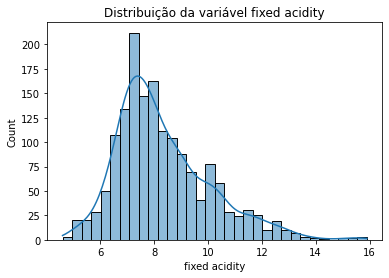

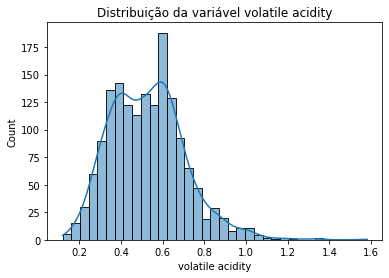

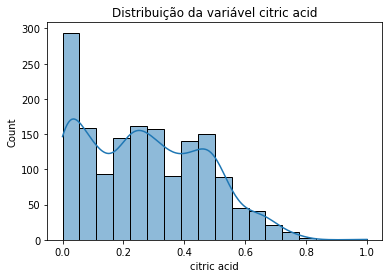

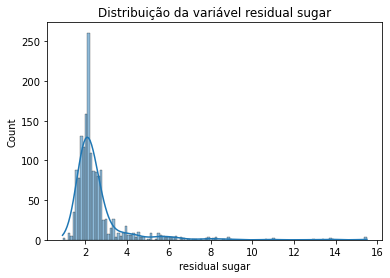

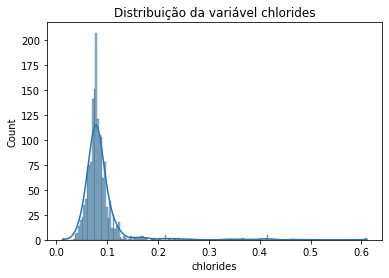

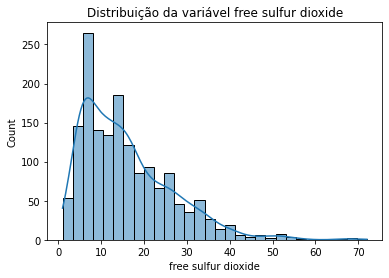

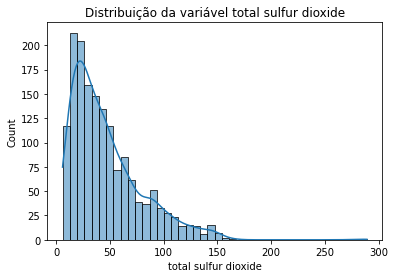

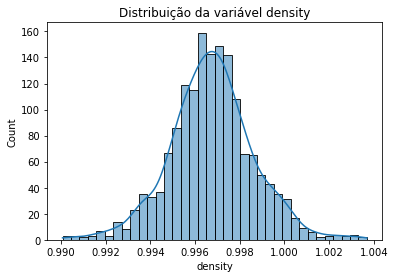

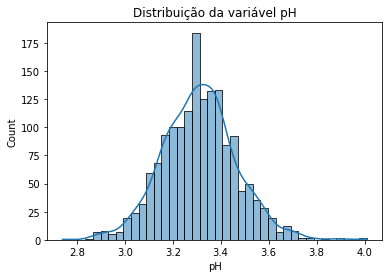

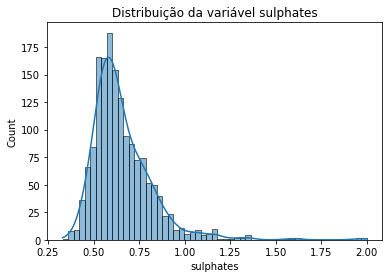

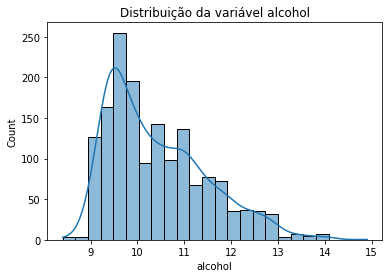

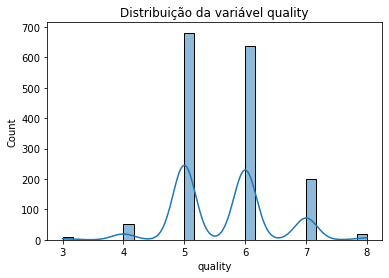

In [5]:
for col in df:    
    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()

_______

3) Utilizando a base de vinhos tintos, responda: existe alguma coluna com outliers? Indique qual método de detecção de outliers você utilizou, justificando seu uso.

In [6]:
for col in df:
    mu, std = df[col].mean(), df[col].std() 
    # usando o critério de |z| > 3 (não é dos melhores, mas tá ok kkkkk)
    aux_outlier = df[col].apply(lambda x: (x-mu)/std).apply(lambda x: True if abs(x) > 3 else False)
    
    if aux_outlier.sum() > 0:        
        print(f"Outliers de {col}:\n")        
        print(aux_outlier[aux_outlier].index.tolist())        
    else:
        print(f"Não há outliers na coluna {col}!")
        
    print()
    print("="*80)
    print()

Outliers de fixed acidity:

[243, 244, 347, 374, 381, 391, 442, 544, 554, 555, 557, 652]


Outliers de volatile acidity:

[38, 120, 126, 127, 199, 672, 690, 724, 1299, 1312]


Outliers de citric acid:

[151]


Outliers de residual sugar:

[33, 163, 164, 274, 324, 325, 396, 400, 480, 494, 595, 649, 652, 911, 917, 923, 1043, 1071, 1074, 1079, 1081, 1186, 1235, 1244, 1434, 1435, 1474, 1476, 1574, 1589]


Outliers de chlorides:

[17, 19, 42, 81, 83, 106, 147, 151, 169, 181, 226, 240, 258, 281, 291, 451, 568, 692, 730, 754, 776, 777, 1051, 1165, 1260, 1319, 1370, 1372, 1374, 1558, 1570]


Outliers de free sulfur dioxide:

[14, 15, 57, 396, 400, 584, 925, 926, 982, 1131, 1154, 1175, 1231, 1244, 1295, 1296, 1358, 1434, 1435, 1474, 1476, 1558]


Outliers de total sulfur dioxide:

[15, 109, 354, 515, 591, 636, 649, 651, 672, 684, 1079, 1081, 1244, 1493, 1496]


Outliers de density:

[442, 480, 554, 555, 557, 608, 836, 837, 889, 1017, 1018, 1114, 1269, 1270, 1434, 1435, 1474, 1476]


Outliers de

_______

4) Utilizando a base de vinhos tintos, estude os dados na coluna `quality`, que é a variável resposta do problema. Em particular, responda:

- Essa é uma variável contínua ou discreta?
- Como as notas estão distribuídas? Quais as notas mais/menos comuns?
- Faz sentido discretizar esta variável em dois níveis categóricos? 
    - Se sim, qual seria o valor de corte, e, com este corte, qual é o significado de cada nível categórico?
    - Como estes dois níveis categóricos estão distribuídos?

In [7]:
df["quality"].value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

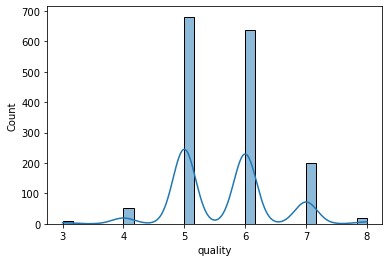

In [8]:
sns.histplot(data=df, x="quality", kde=True);

In [9]:
df["quality_bin"] = df["quality"].apply(lambda x: "good" if x>5 else "bad")
df["quality_bin"].value_counts(normalize=True)

good    0.534709
bad     0.465291
Name: quality_bin, dtype: float64

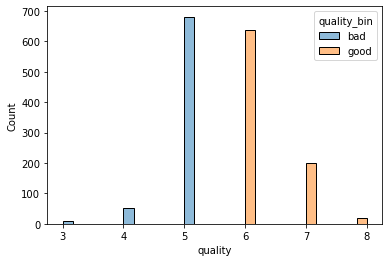

In [10]:
sns.histplot(data=df, x="quality", hue="quality_bin");

_______

5) Utilizando a base de vinhos tintos, calcule e/ou visualize a correlação (utilizando a relação que achar mais adequada) entre as variáveis na base. 

Em particular, estude a correlação entre as features e o target `quality`, e responda se há correlações fortes.

Plote também a relação entre cada uma das features e o target (na forma de um scatterplot, por exemplo).

Com base nas análises acima, responda: é uma boa ideia modelar o problema como um problema de regressão? Se sim, que métodos de aprendizagem você utilizaria?

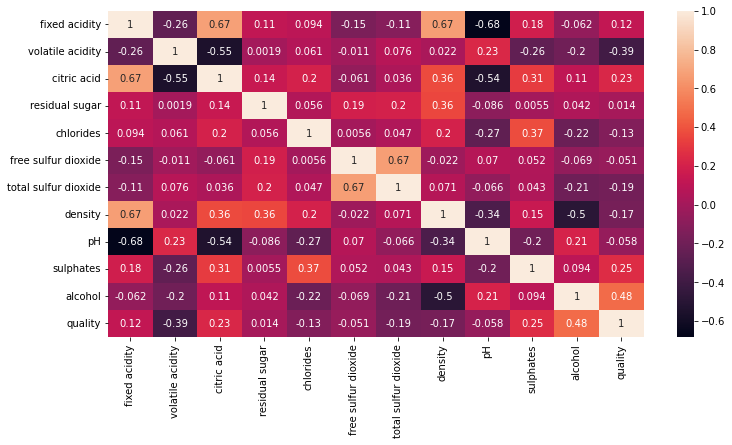

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
df.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

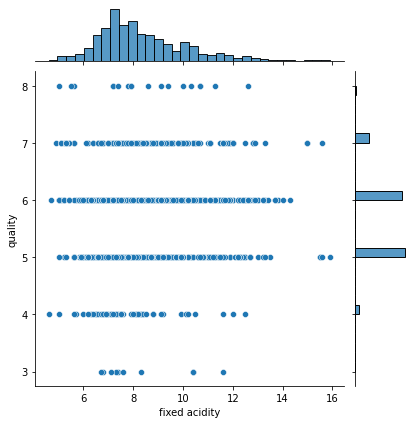

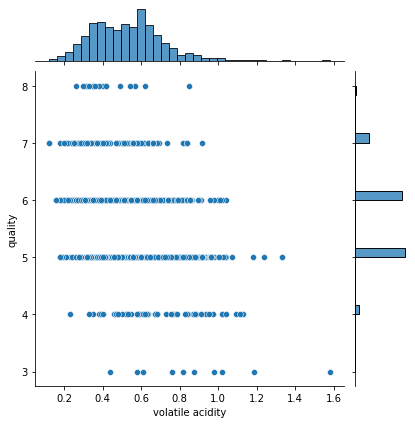

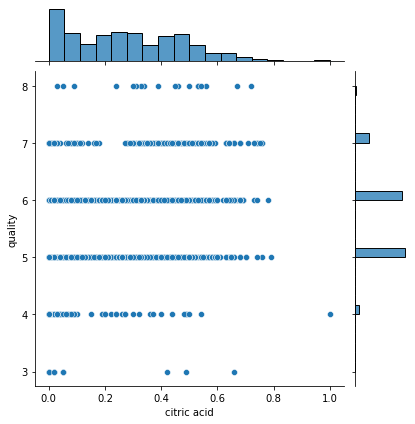

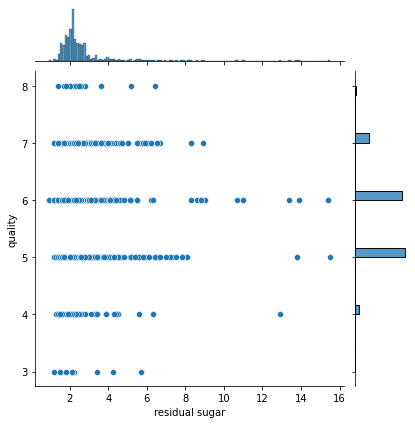

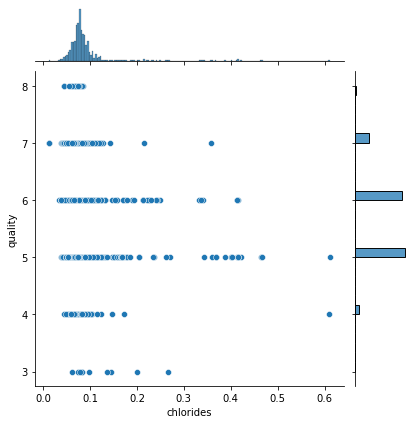

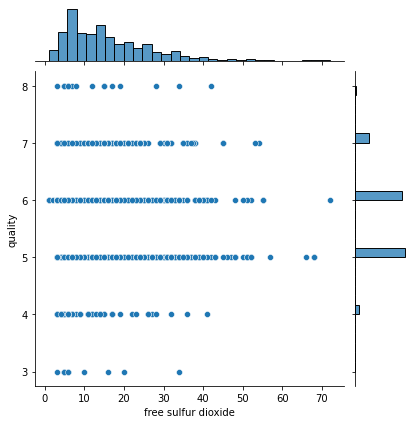

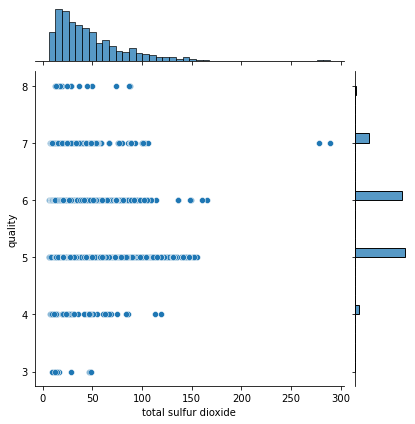

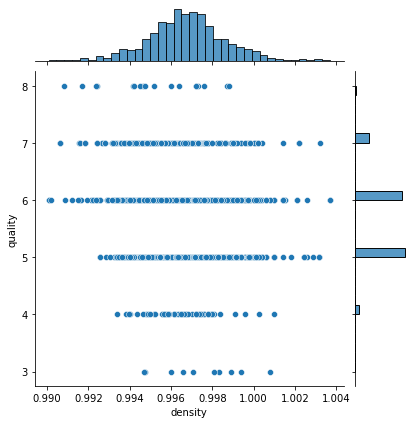

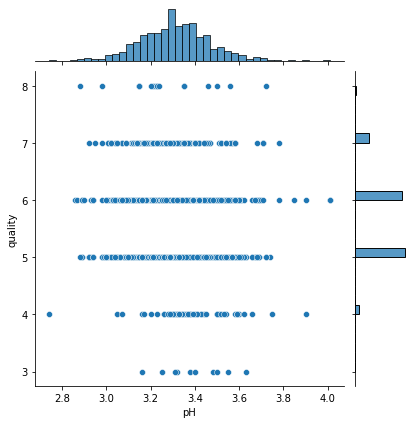

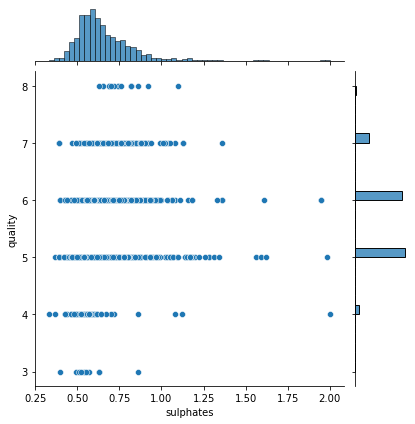

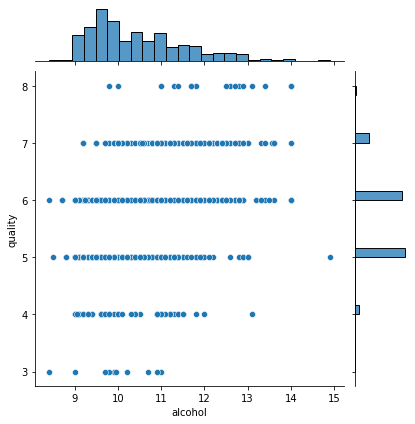

In [13]:
for col in df.drop(columns="quality quality_bin".split()):    
    sns.jointplot(data=df, x=col, y="quality")
    plt.show()

_______

6) Utilizando a base de vinhos tintos, calcule e/ou visualize (em um gráfico de barras, ou como preferir) o intervalo de confiança de 90% para a média de cada uma das variáveis físico-químicas, agrupadas pelos níveis categóricos da variável resposta `quality`. Que conclusões são possíveis tirar destes gráficos?

Sugestão: utilizar o seaborn para a visualização.

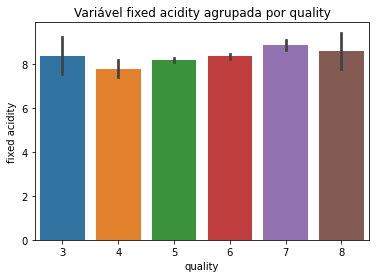

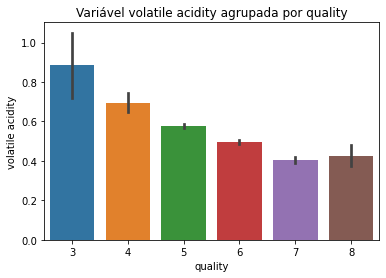

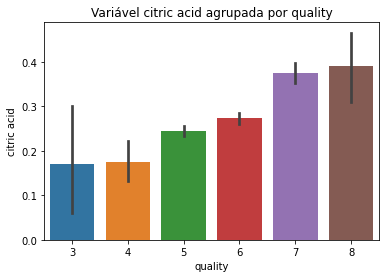

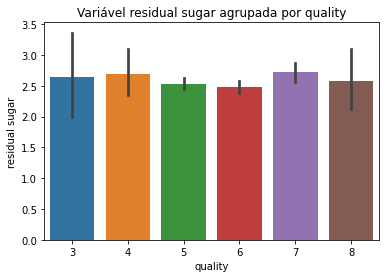

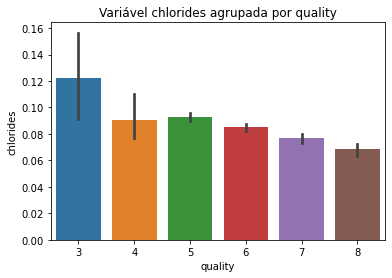

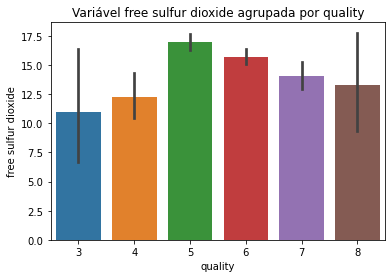

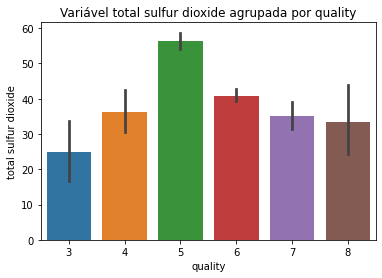

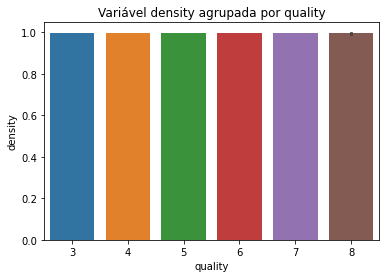

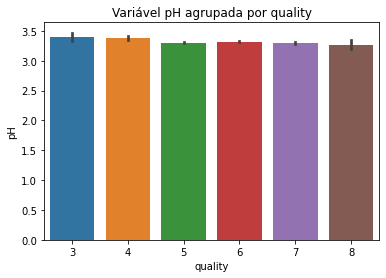

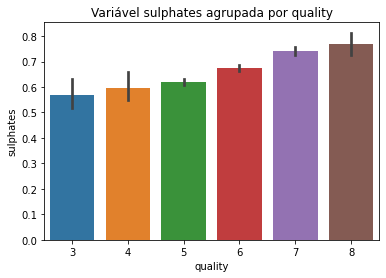

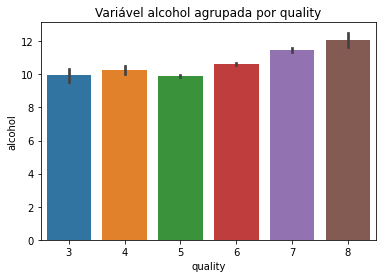

In [14]:
for col in df.drop(columns="quality quality_bin".split()):    
    sns.barplot(data=df, x="quality", y=col, ci=90).set_title(f"Variável {col} agrupada por quality")
    plt.show()

_______

7) Utilizando a base de vinhos tintos, discretize a variável resposta `quality` em dois níveis categóricos para transformar o problema em um problema de classificação binária. Como valor de corte, utilize aquele que seja tal que os dois níveis categóricos estejam o mais igualmente distribuídos possível (isto é, um corte que minimize o desbalanceamento das classes). Sugestão: teste todos os valores de corte possíveis (não são muitos!)

Após a determinação do valor de corte que satisfaça às condições acima, responda: o que, qualitativamente, cada uma das duas classes representa? Esta discretização faz sentido? Se sim, para facilitar análises posteriores, nomeie as classes de acordo.

Dica: vamos usar esta nova variável resposta binária nas análises dos próximos exercícios, então sugiro que o dataframe com esta variável seja salvo num arquivo, para que ele possa ser simplesmente lido posteriormente.


Distribuição de classes para corte em 3:


1    0.993746
0    0.006254
Name: quality, dtype: float64

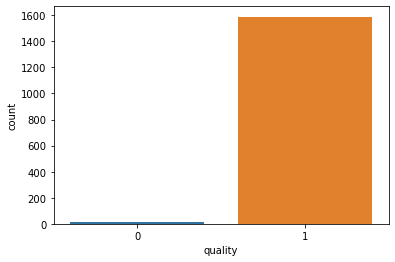


Distribuição de classes para corte em 4:


1    0.9606
0    0.0394
Name: quality, dtype: float64

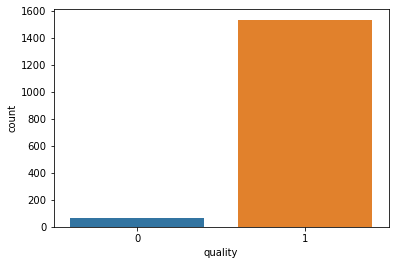


Distribuição de classes para corte em 5:


1    0.534709
0    0.465291
Name: quality, dtype: float64

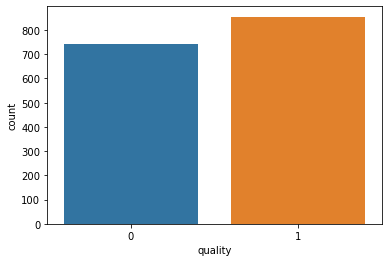


Distribuição de classes para corte em 6:


0    0.86429
1    0.13571
Name: quality, dtype: float64

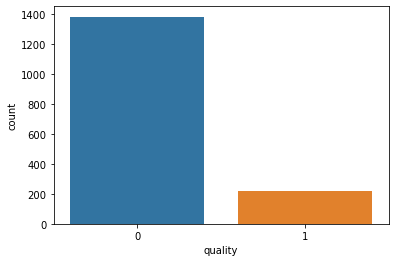


Distribuição de classes para corte em 7:


0    0.988743
1    0.011257
Name: quality, dtype: float64

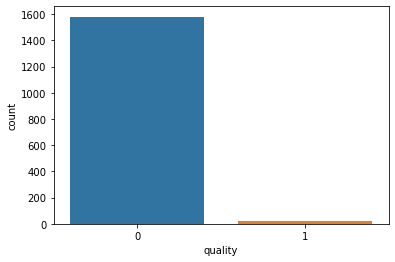


Distribuição de classes para corte em 8:


0    1.0
Name: quality, dtype: float64

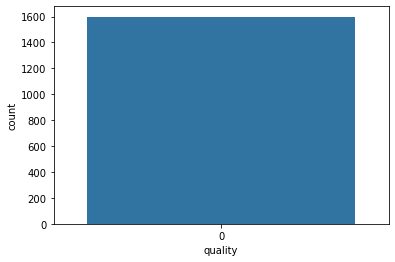

In [15]:
for corte in df["quality"].sort_values().unique():    
    print(f"\nDistribuição de classes para corte em {corte}:")    
    aux_bin = df["quality"].apply(lambda x: 1 if x > corte else 0)    
    display(aux_bin.value_counts(normalize=True))    
    sns.countplot(x=aux_bin)
    plt.show()

In [16]:
df["quality_bin"] = df["quality"].apply(lambda x: "good" if x>5 else "bad")

In [17]:
df = df.drop(columns="quality")

In [18]:
df.to_csv("winequality-red-binary.csv", index=False)

_______

8) Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes ("good" para score maior que 5; "bad" caso contrário). Vamos agora analisar a separabilidade das duas classes do problema. Para isso, faça:

- Visualize as distribuições das features, com indicação dos diferentes níveis categóricos do target;
- Visualize as projeções dos dados em cada um dos subespaços de pares de features, com indicação dos níveis categóricos do target;

Responda: com base nesta análise, o problema é linearmente separável?

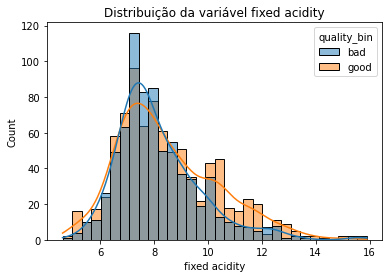

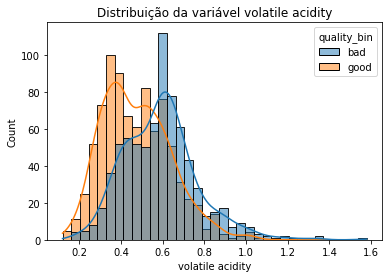

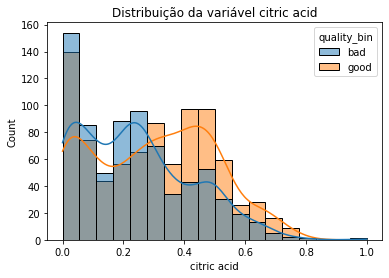

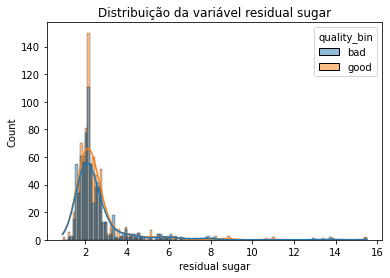

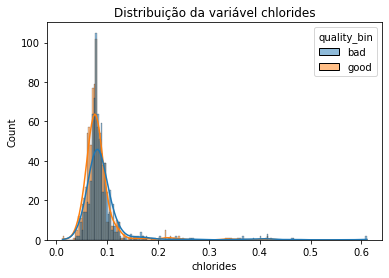

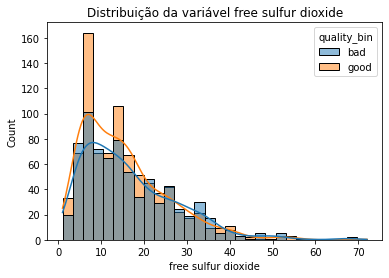

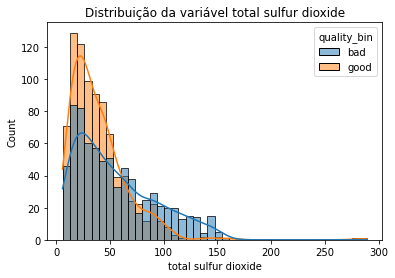

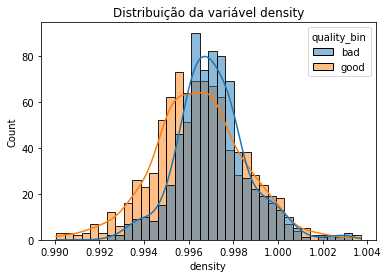

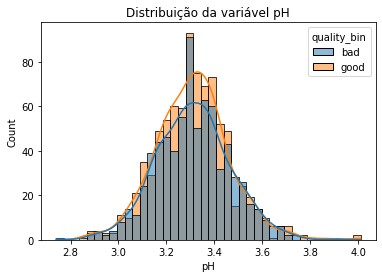

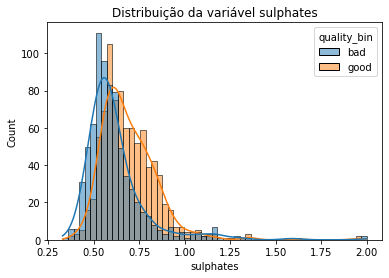

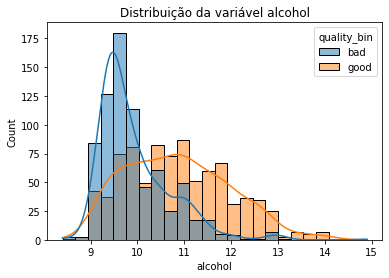

In [19]:
for col in df.drop(columns="quality_bin"):    
    sns.histplot(data=df, x=col, kde=True, hue="quality_bin").set_title(f"Distribuição da variável {col}")
    plt.show()

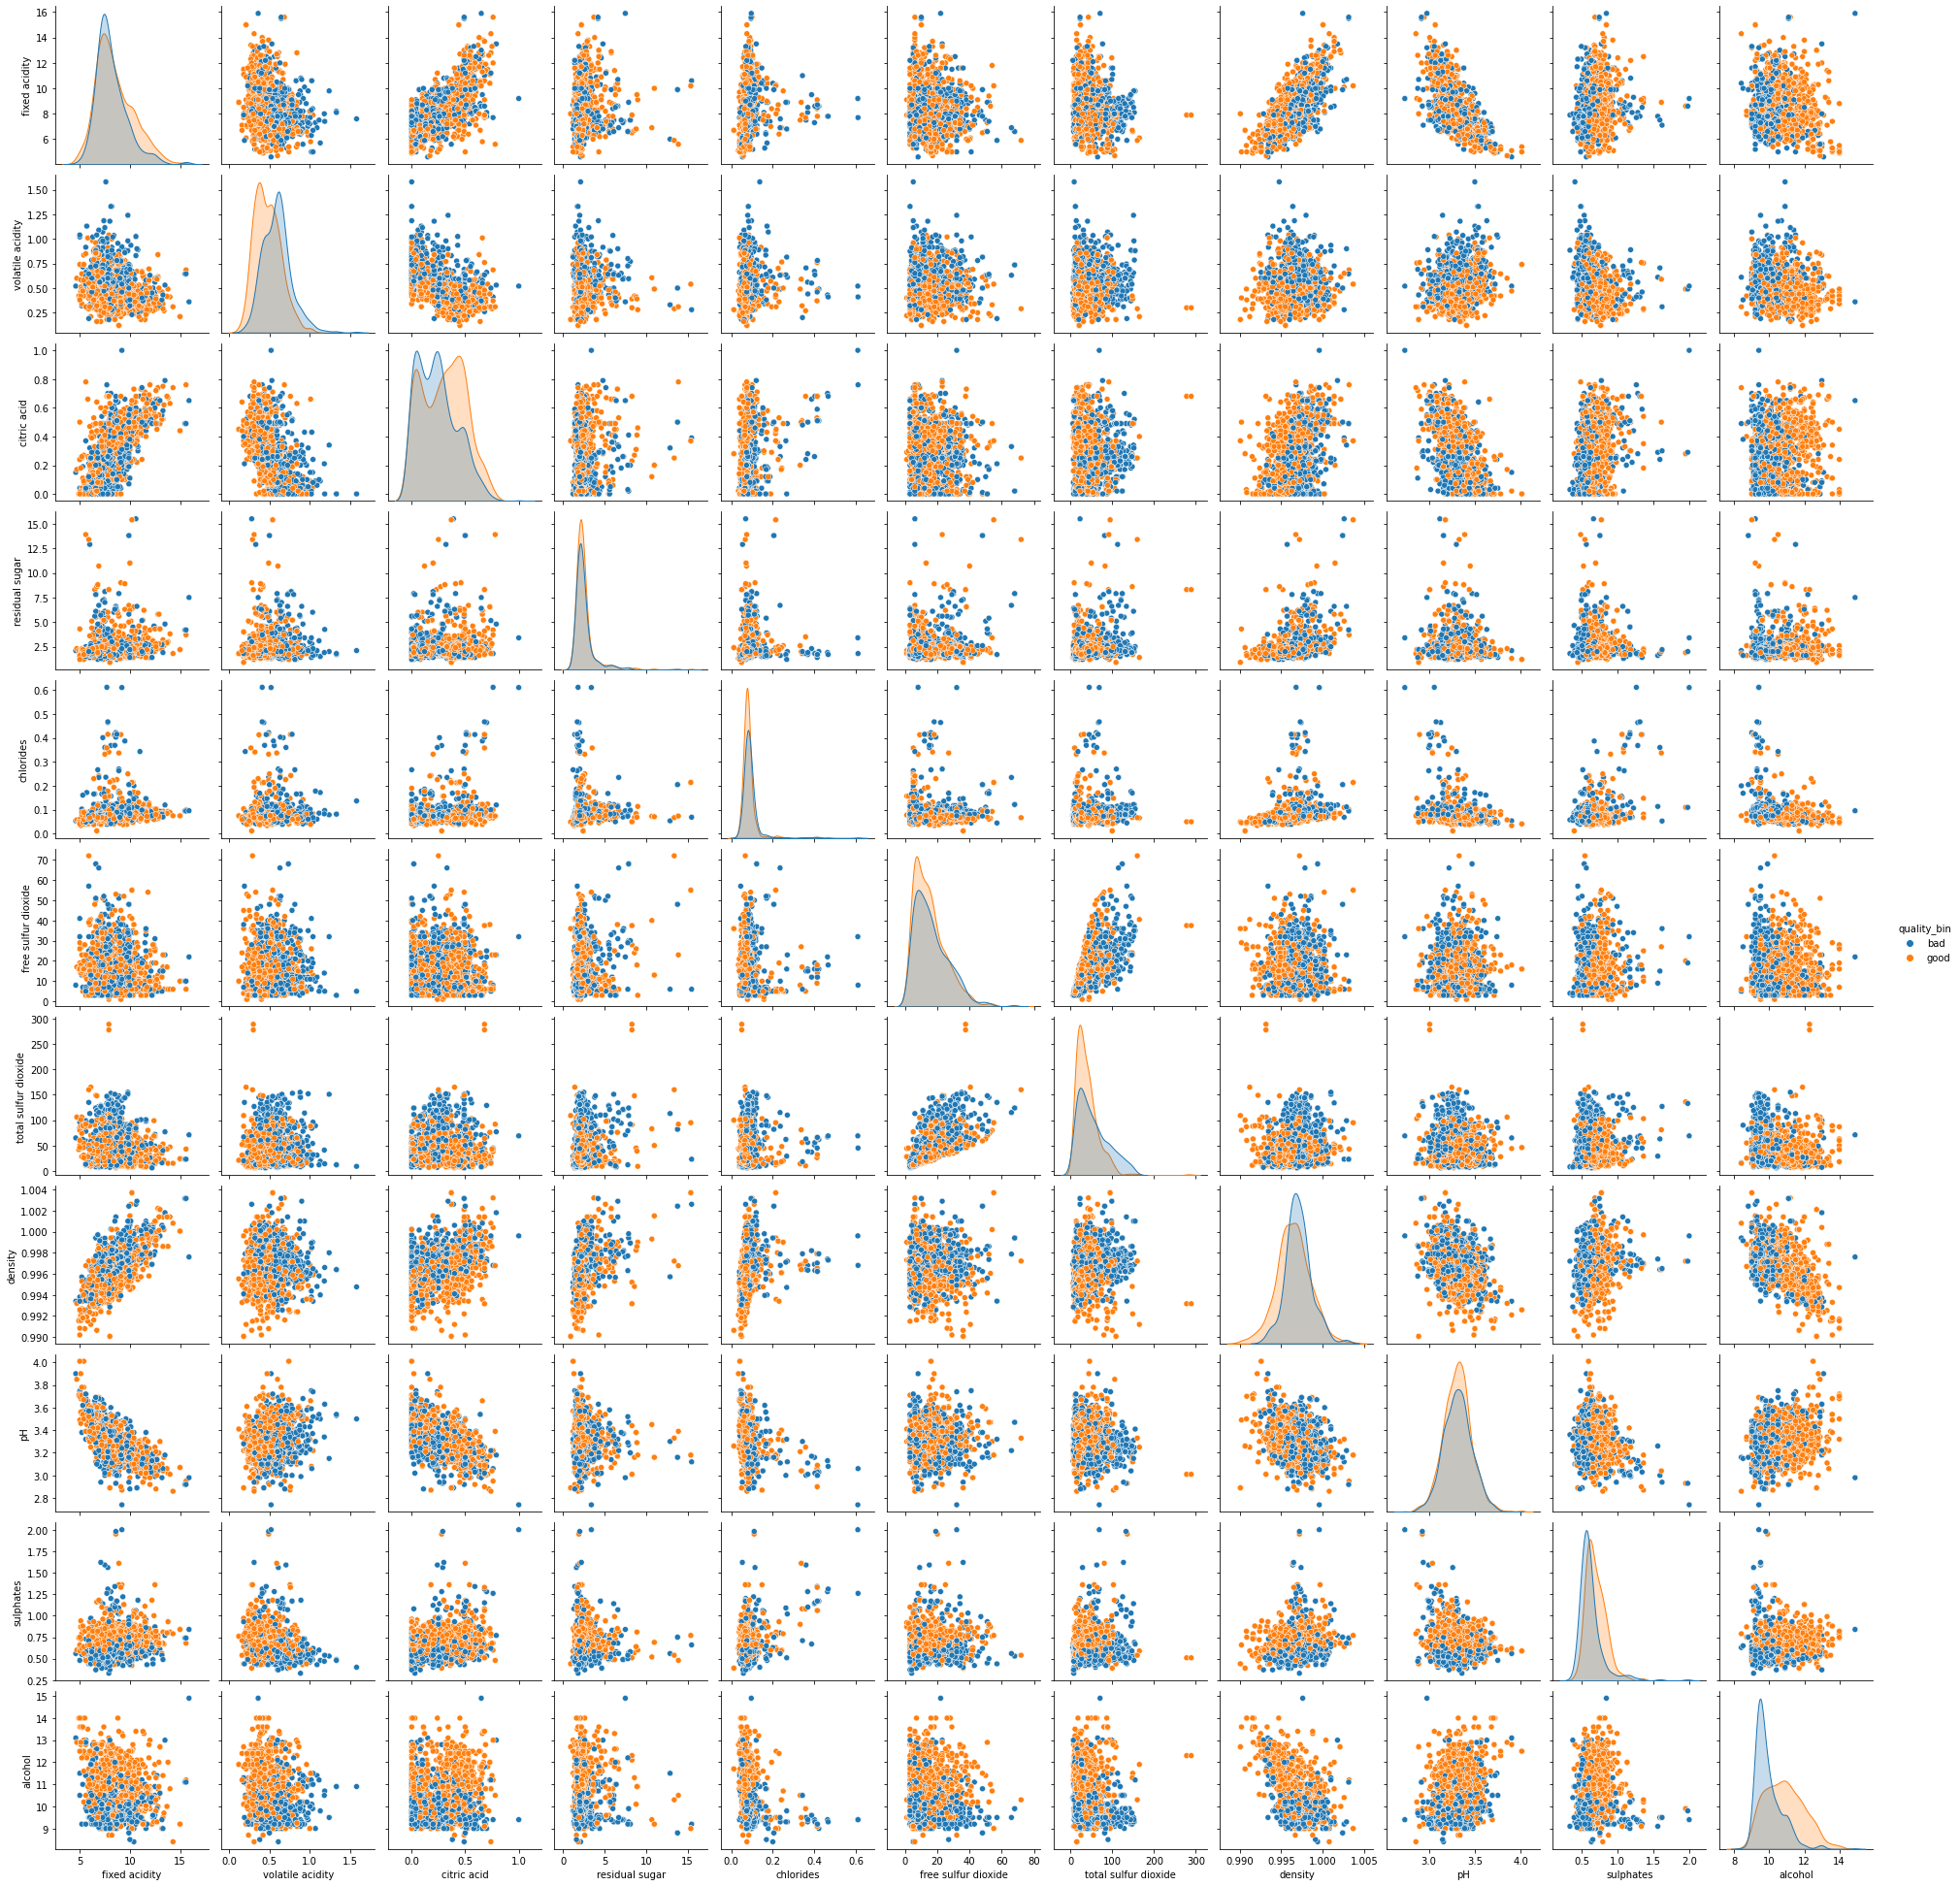

In [20]:
sns.pairplot(df, hue="quality_bin");

_______

9) Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes ("good" para score maior que 5; "bad" caso contrário). Separe o dataset em dados de treino (70%) e de teste (30%), estratifidando pelo target. Utilize `random_state=42` como seed, para fins de reprodutibilidade.

Apenas com os dados de treino, calcule as componentes principais do espaço de features, e responda:

- Quantas componentes principais são necessárias para que pelo menos 90% da variância do dataset seja explicada?
- Faça um scatterplot das duas primeiras componentes principais, com indicação dos níveis categóricos do target;
    - No sub-espaço das duas primeiras componentes principais, há separabilidade linear dos dados?

Dica: utilize as ferramentas do scikit-learn.

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["quality_bin"])
y = df["quality_bin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
df_train = pd.concat([X_train, y_train], axis=1)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe_pca = Pipeline([("ss", StandardScaler()),
                     ("pca", PCA())]).fit(X_train)

pipe_pca["pca"].explained_variance_ratio_.cumsum()*100

array([ 28.19843968,  45.30223515,  59.72346528,  70.74889447,
        79.4223698 ,  85.41858476,  90.75406672,  94.72211484,
        97.79694583,  99.47197142, 100.        ])

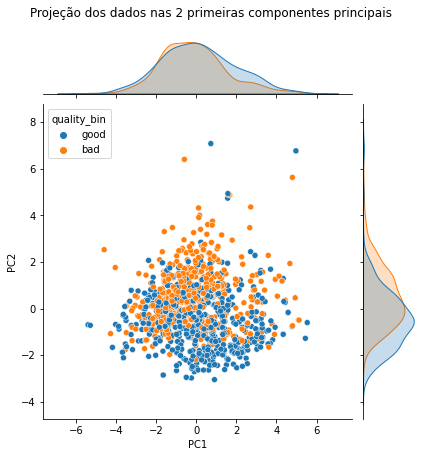

In [23]:
pipe_pca = Pipeline([("ss", StandardScaler()),
                     ("pca", PCA(n_components=2))]).fit(X_train)

X_train_pca = pd.DataFrame(pipe_pca.transform(X_train), 
                           index = X_train.index,
                           columns=[f"PC{i+1}" for i in range(pipe_pca[-1].n_components_)])

X_pca_y = pd.concat([X_train_pca, y_train], axis=1)

# ==========================

g = sns.jointplot(data=X_pca_y, x="PC1", y="PC2", hue="quality_bin")
g.fig.suptitle(f"Projeção dos dados nas 2 primeiras componentes principais", y=1.05)
plt.show()

_______

10) Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes ("good" para score maior que 5; "bad" caso contrário). Separe o dataset em dados de treino (70%) e de teste (30%), estratifidando pelo target. Utilize `random_state=42` como seed, para fins de reprodutibilidade. Usando os dados de treino, faça:

- Agrupe os dados pelos níveis categóricos do target, e calcule a média de cada uma das features;

- Faça um teste de hipótese para determinar se, a um nível de significância de 5%, há diferença na média de cada uma das sub-amostras de cada classe, para todas as variáveis;

- Compare a distribuição das features analisando o boxplot de cada uma, separados pelas duas classes do target.

Dica: utilize as ferramentas do scipy e do scikit-learn.

In [24]:
df_train.groupby("quality_bin").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality_bin,,,,,,,,,,,
bad,8.142418,0.586631,0.242937,2.538292,0.092027,16.623800,54.929942,0.997074,3.316296,0.618426,9.955182
good,8.513545,0.475936,0.301739,2.558612,0.082712,14.999164,39.081940,0.996502,3.312525,0.692157,10.863434


In [25]:
# teste de hipótese: to-do

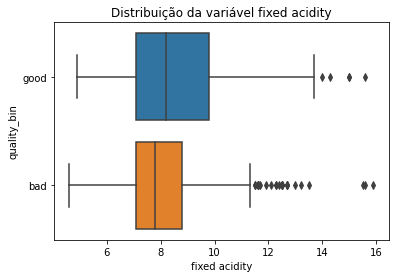

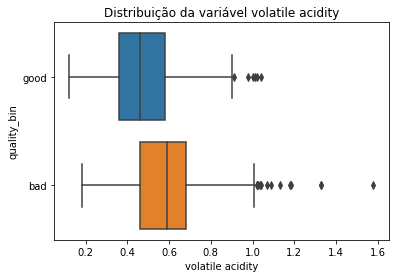

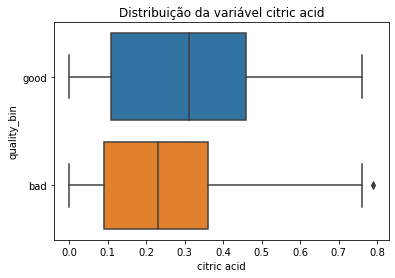

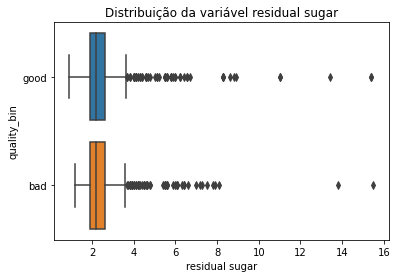

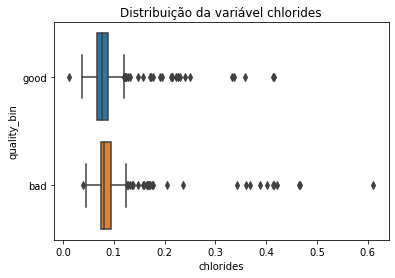

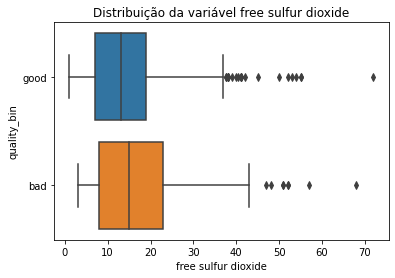

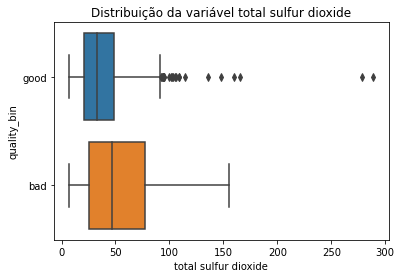

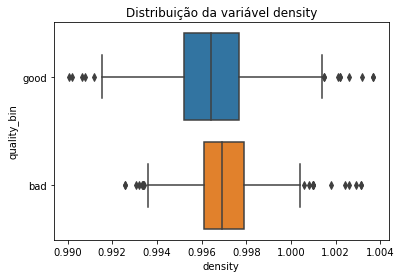

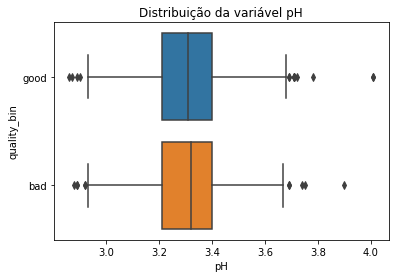

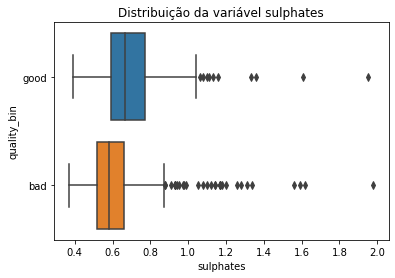

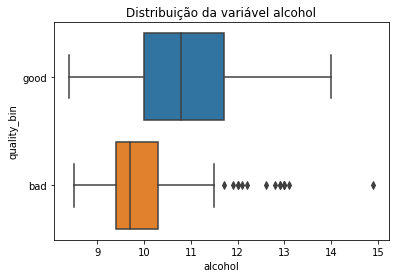

In [26]:
for col in X_train:    
    sns.boxplot(data=df_train, x=col, y="quality_bin").set_title(f"Distribuição da variável {col}")
    plt.show()

__________
__________
__________


# Challenge DS - Continuação

No decorrer dos últimos dias, enviamos diversas questões a serem respondidas com base no dataset `winequality-red`, uma amostra de dados sobre vinhos, contendo as seguintes informações:

- Medidas de 11 variáveis físico-químicas que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - fixed acidity - medida da acidez devido à presença de ácidos orgânicos de baixa volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho;
    - 2 - volatile acidity - medida da acidez devido a ácidos de baixo peso molecular (sobretudo ácido acético) presentes no vinho, que são responsáveis pelo aroma e gosto de vinagre;
    - 3 - citric acid - medida de ácido cítrico no vinho;
    - 4 - residual sugar - medida de açúcar residual presente no vinho, com origem nos resíduos de açúcar da uva que permanecem no vinho após o fim da fermentação;
    - 5 - chlorides - medida de cloretos (íons de cloro) no vinho;
    - 6 - free sulfur dioxide - medida de dióxido de enxofre livre (isto é, que não está ligado a outras moléculas) no vinho;
    - 7 - total sulfur dioxide - medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho;
    - 8 - density - medida da densidade do vinho;
    - 9 - pH - medida do pH do vinho;
    - 10 - sulphates - medida de sulfatos (íons SO₄²⁻) no vinho;
    - 11 - alcohol - medida da graduação alcoólica do vinho.
<br><br>
- Além disso, há a variável resposta que no caso é um score numérico:
<br><br>
    - 12 - quality - score numérico de qualidade (de 0 a 10), produzido com base em dados sensoriais.

Para maiores informações sobre a coleta e origem dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

Se você respondeu às questões anteriores, você completou, talvez sem perceber, o importantíssimo (e longo!) processo de análise exploratória dos dados (EDA, do termo inglês _exploratory data analysis_)!

De fato, a etapa de EDA é importantíssima em todo projeto de ciência de dados, pois é apenas explorando os dados que de fato nos familiarizamos com o contexto do problema com o qual estamos trabalhando, o que é fundamental para o sucesso das próximas etapas, que pode envolver a criação e avaliação de modelos de machine learning (que é exatamente o caso deste challenge!)

Assim, se você ainda não fez os últimos exercícios de DS da comunidade, recomendo fortemente que você as responda primeiro, antes de seguir com o Challenge!

Sem mais delongas, vamos ao enunciado do Challenge de Julho!

___________

Suponha que você é um cientista de dados que trabalha na área de *advanced analytics* de uma empresa especializada na distribuição e vendas de vinhos tintos. Naturalmente, a empresa está interessada em vender vinhos que sejam percebidos como bons por grande parte do público. Pensando nisso, foi feita uma pesquisa, na qual vinhos tintos com diferentes características físico-químicas foram oferecidos a alguns voluntários, que, após experimentá-los, deram notas de 0 a 10. Com base nestes dados coletados, seu objetivo é produzir um modelo capaz de distinguir vinhos bons de ruins, com base nas medidas de suas características físico-químicas. 

Com este modelo, caso produtoras de vinho ofereçam um novo vinho para ser vendido por sua empresa, será possível decidir de maneira mais direcionada se vale a pena passar a vender este produto ou não, de acordo com a predição de sua qualidade dada pelo modelo.

Dentro deste contexto, seu objetivo como cientista de dados é claro:

> Agregar valor ao negócio, explorando os dados que você tem à disposição.

Na primeira sprint do projeto, você e outros colegas do time de ciência de dados chegaram na seguinte _TO-DO list_ para o projeto. Algumas atividades já foram executadas nas primeiras semanas de trabalho (o time é muito bom!), mas agora ainda restam algumas atividades muito importantes (e divertidas!) a serem feitas:

- [x] Ingestão dos dados e detalhada análise exploratória
- [x] Formulação do problema
- [ ] Primeiro modelo baseline
- [ ] Iterações pelo ciclo de modelagem
- [ ] Compílação dos resultados para o negócio
- [ ] Comunicação dos resultados

Bom trabalho, e divirta-se! :D

#### Modelo baseline

In [27]:
df = pd.read_csv('winequality-red-binary.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_bin           1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


##### Separação dos dados

In [29]:
y = df["quality_bin"]
y

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality_bin, Length: 1599, dtype: object

In [30]:
x = df.drop(columns="quality_bin")
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [31]:
#y.value_counts()
y.value_counts(normalize=True)*100

good    53.470919
bad     46.529081
Name: quality_bin, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

##### Construção do Modelo

In [33]:
from sklearn.linear_model import LogisticRegression
# Escalando (normalizando) os valores dos Dados
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [34]:
etapas = [('scaler', StandardScaler()),
          ('logit', LogisticRegression())]

pipe_logit = Pipeline(etapas).fit(x_train, y_train)
pipe_logit

Pipeline(steps=[('scaler', StandardScaler()), ('logit', LogisticRegression())])

In [35]:
y_pred = pipe_logit.predict(x_test)
y_pred[:5] # preditos
#y_test.iloc[:5].values # originais

array(['good', 'bad', 'bad', 'good', 'good'], dtype=object)

##### Avaliando o Modelo

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

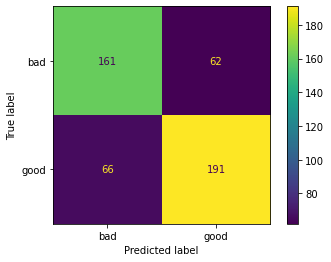

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [40]:
print(classification_report(y_test, y_pred)) # métricas

              precision    recall  f1-score   support

         bad       0.71      0.72      0.72       223
        good       0.75      0.74      0.75       257

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



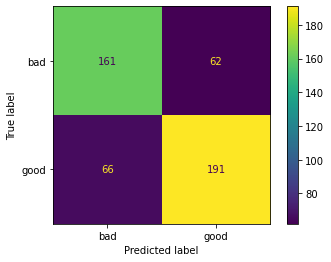

              precision    recall  f1-score   support

         bad       0.71      0.72      0.72       223
        good       0.75      0.74      0.75       257

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



In [42]:
# Construção do Modelo
etapas = [('scaler', StandardScaler()),
          ('logit', LogisticRegression())]

pipe_logit = Pipeline(etapas).fit(x_train, y_train)
y_pred = pipe_logit.predict(x_test)

# Avaliação do Modelo
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
plt.show()
print(classification_report(y_test, y_pred)) # métricas